In [1]:
%%capture
!pip install datasets
!pip install transformers==4.31.0

In [2]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from datasets import load_dataset
import numpy as np
import re
import spacy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Generating train split:   0%|          | 0/546 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/116 [00:00<?, ? examples/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.7409 - accuracy: 0.6149
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 25s 1s/step - loss: 0.7409 - accuracy: 0.6149 - val_loss: 0.5664 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.7126
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 307ms/step - loss: 0.5559 - accuracy: 0.7126 - val_loss: 0.5262 - val_accuracy: 0.7500
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.6068 - accuracy: 0.7040
Epoch 3: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 377ms/step - loss: 0.6068 - accuracy: 0.7040 - val_loss: 0.4913 - val_accuracy: 0.7500
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.7701
Epoch 4: val_accuracy improved from 0.76136 to 0

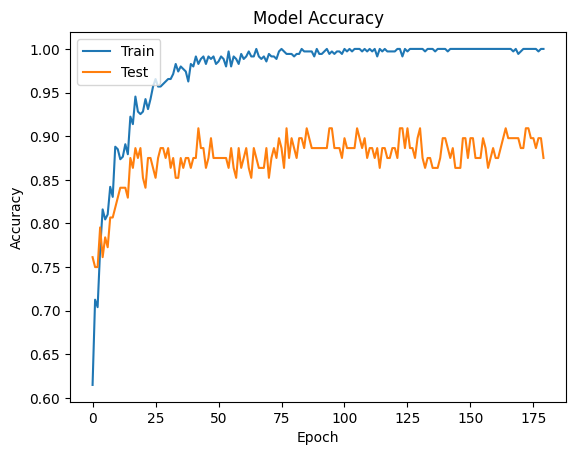

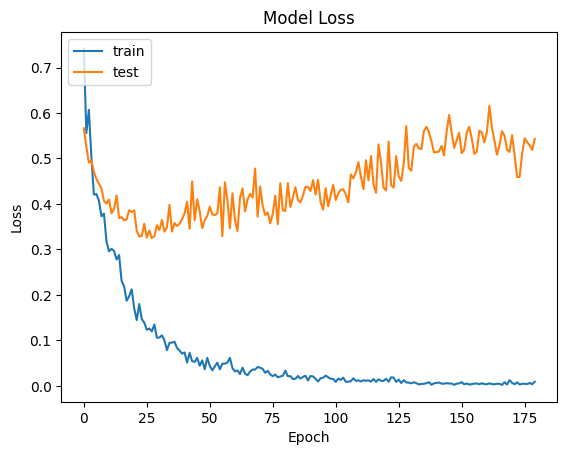

4/4 [==============================] - 1s 119ms/step - loss: 0.2534 - accuracy: 0.8818
Loss of the model is -  0.25344106554985046
4/4 [==============================] - 1s 119ms/step - loss: 0.2534 - accuracy: 0.8818
Accuracy of the model is -  88.1818175315857 %
4/4 [==============================] - 3s 118ms/step


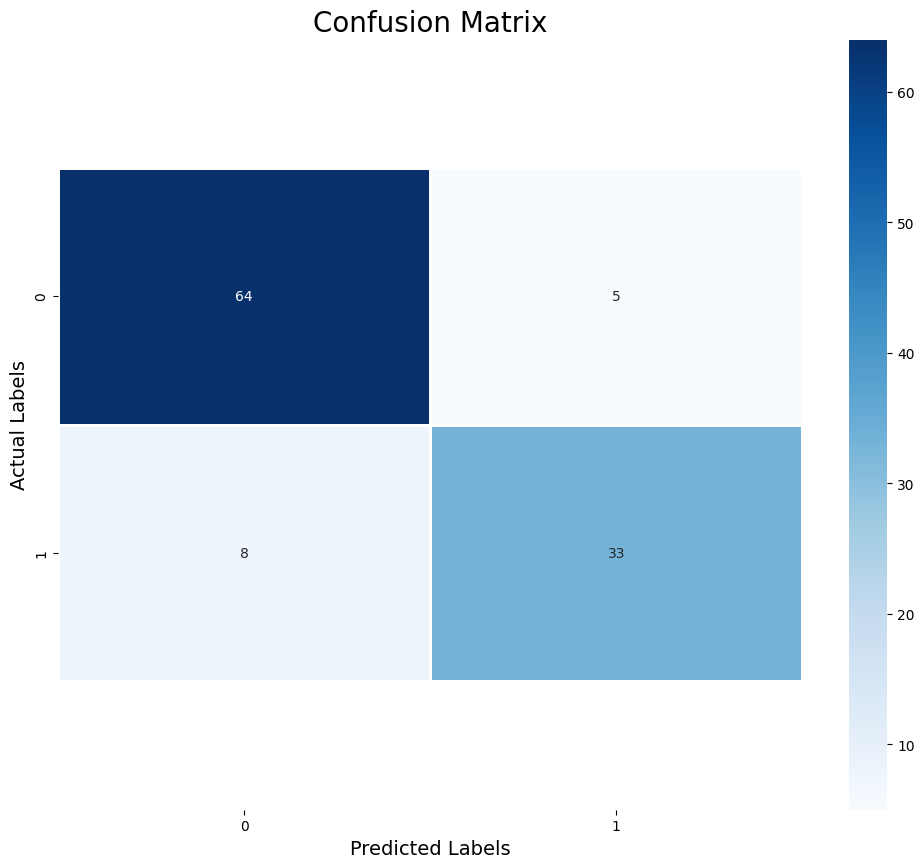

4/4 [==============================] - 0s 117ms/step - loss: 0.2534 - accuracy: 0.8818
Accuracy for <bound method PromptInjectionDetector.combination_5 of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8818181753158569


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.6149
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 19s 1s/step - loss: 0.6854 - accuracy: 0.6149 - val_loss: 0.5371 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5537 - accuracy: 0.7615
Epoch 2: val_accuracy improved from 0.76136 to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 5s 897ms/step - loss: 0.5537 - accuracy: 0.7615 - val_loss: 0.4635 - val_accuracy: 0.7727
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.4738 - accuracy: 0.7874
Epoch 3: val_accuracy improved from 0.77273 to 0.79545, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 805ms/step - loss: 0.4738 - accuracy: 0.7874 - val_loss: 0.4672 - val_accuracy: 0.7955
Epoch 4/180
6/6 [==============================] - 

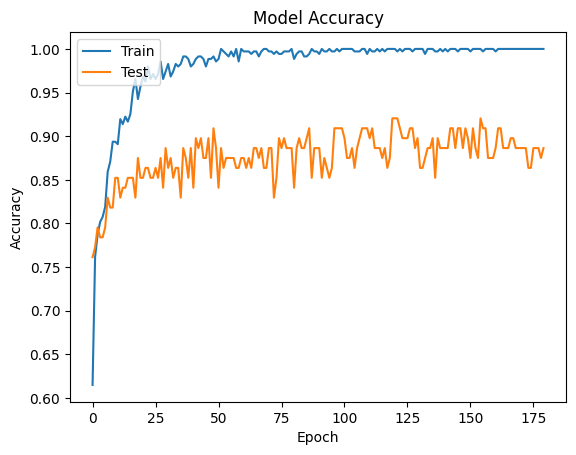

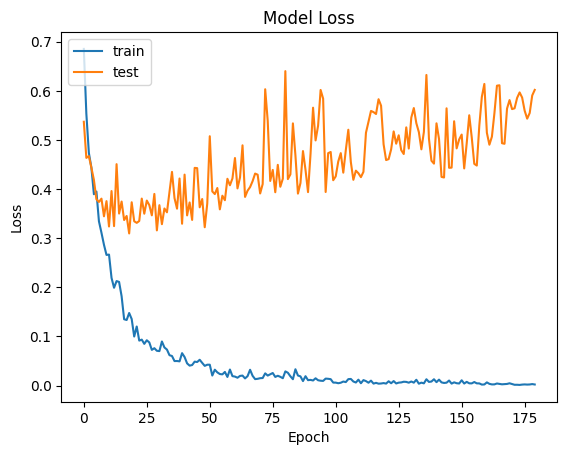

4/4 [==============================] - 1s 124ms/step - loss: 0.3543 - accuracy: 0.8909
Loss of the model is -  0.3542785346508026
4/4 [==============================] - 1s 119ms/step - loss: 0.3543 - accuracy: 0.8909
Accuracy of the model is -  89.09090757369995 %
4/4 [==============================] - 4s 120ms/step


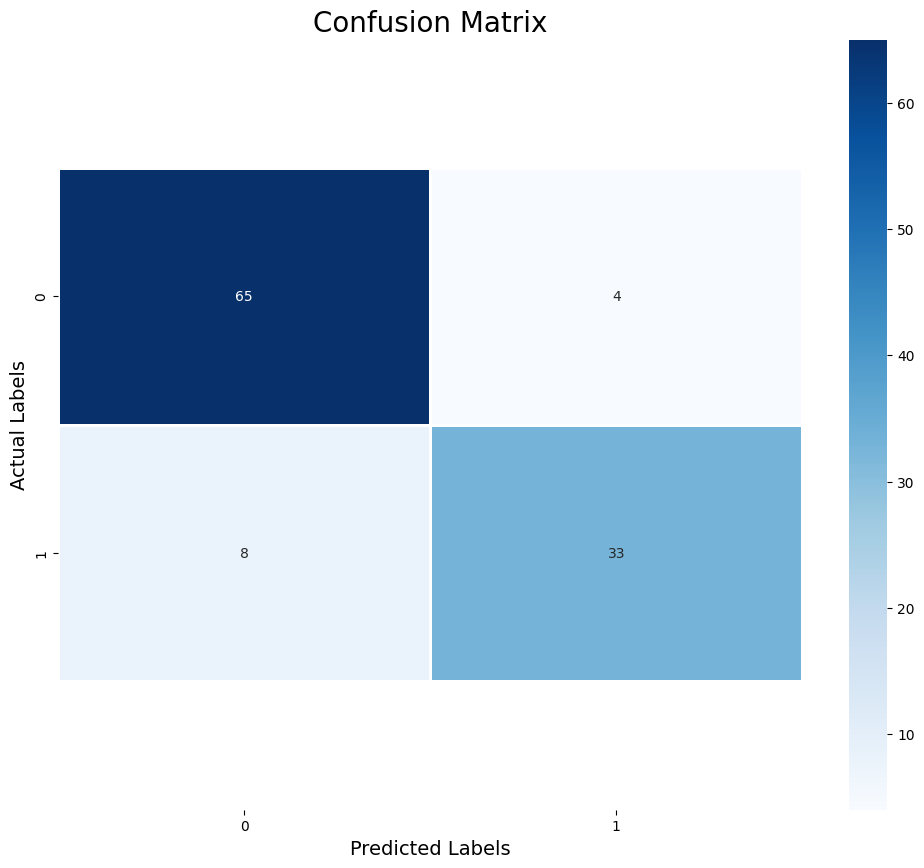

4/4 [==============================] - 1s 119ms/step - loss: 0.3543 - accuracy: 0.8909
Accuracy for <bound method PromptInjectionDetector.combination_4 of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8909090757369995


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.8443 - accuracy: 0.5603
Epoch 1: val_accuracy improved from -inf to 0.78409, saving model to best_initial_model.hdf5
6/6 [==============================] - 19s 1s/step - loss: 0.8443 - accuracy: 0.5603 - val_loss: 0.5566 - val_accuracy: 0.7841
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.6335 - accuracy: 0.6954
Epoch 2: val_accuracy did not improve from 0.78409
6/6 [==============================] - 2s 334ms/step - loss: 0.6335 - accuracy: 0.6954 - val_loss: 0.5215 - val_accuracy: 0.7500
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5344 - accuracy: 0.7615
Epoch 3: val_accuracy improved from 0.78409 to 0.79545, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 775ms/step - loss: 0.5344 - accuracy: 0.7615 - val_loss: 0.4340 - val_accuracy: 0.7955
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4760 - accuracy: 0.7701
Epo

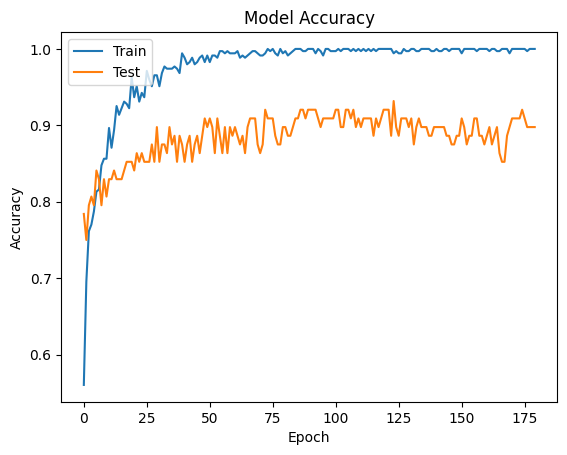

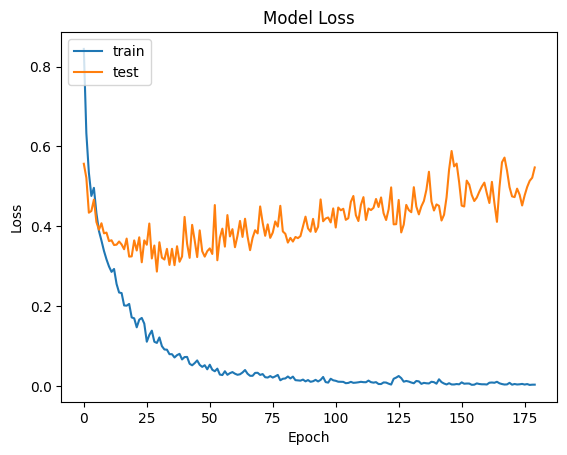

4/4 [==============================] - 1s 131ms/step - loss: 0.3377 - accuracy: 0.9182
Loss of the model is -  0.3376608192920685
4/4 [==============================] - 1s 127ms/step - loss: 0.3377 - accuracy: 0.9182
Accuracy of the model is -  91.8181836605072 %
4/4 [==============================] - 3s 117ms/step


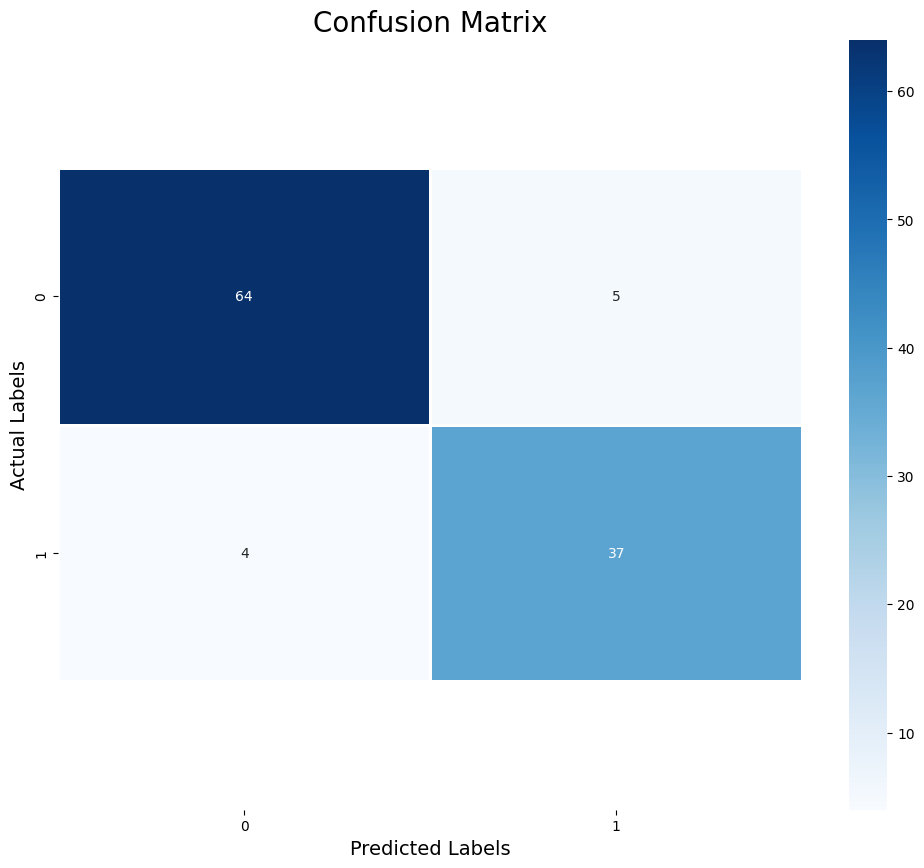

4/4 [==============================] - 1s 122ms/step - loss: 0.3377 - accuracy: 0.9182
Accuracy for <bound method PromptInjectionDetector.combination_3 of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.918181836605072


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.6868
Epoch 1: val_accuracy improved from -inf to 0.72727, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 1s/step - loss: 0.6488 - accuracy: 0.6868 - val_loss: 0.6284 - val_accuracy: 0.7273
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5944 - accuracy: 0.6954
Epoch 2: val_accuracy did not improve from 0.72727
6/6 [==============================] - 2s 332ms/step - loss: 0.5944 - accuracy: 0.6954 - val_loss: 0.6245 - val_accuracy: 0.7273
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5731 - accuracy: 0.7471
Epoch 3: val_accuracy improved from 0.72727 to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 776ms/step - loss: 0.5731 - accuracy: 0.7471 - val_loss: 0.4403 - val_accuracy: 0.7727
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.5170 - accuracy: 0.7557
Epo

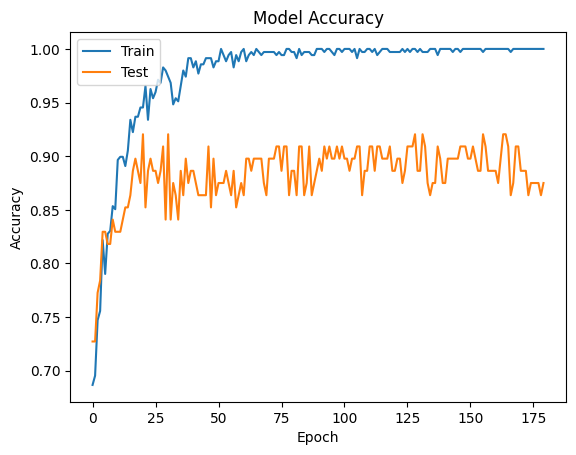

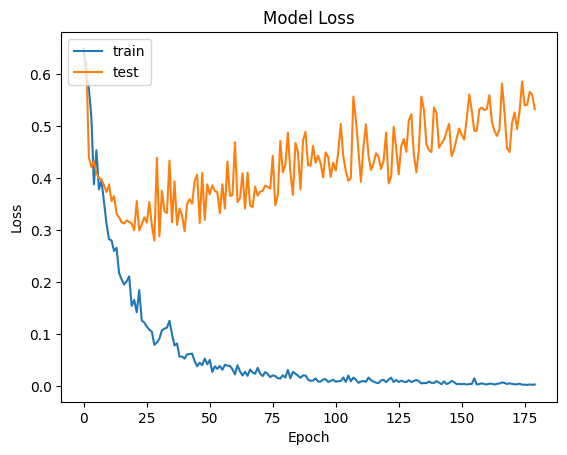

4/4 [==============================] - 1s 130ms/step - loss: 0.2622 - accuracy: 0.8909
Loss of the model is -  0.2621570825576782
4/4 [==============================] - 1s 121ms/step - loss: 0.2622 - accuracy: 0.8909
Accuracy of the model is -  89.09090757369995 %
4/4 [==============================] - 3s 118ms/step


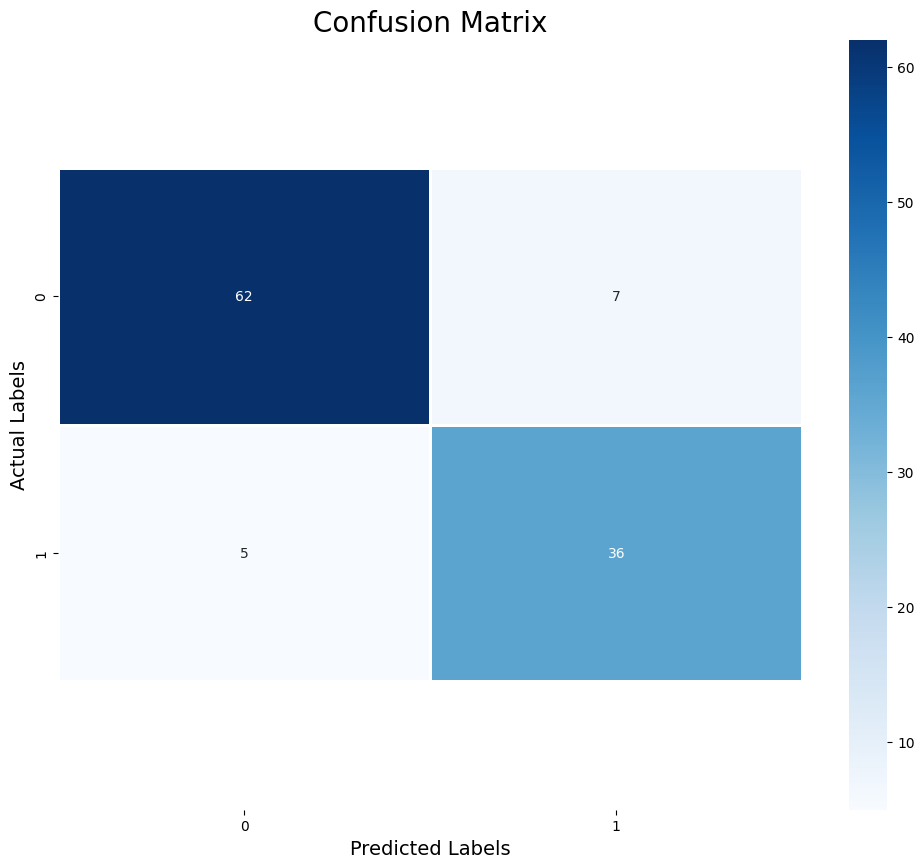

4/4 [==============================] - 1s 120ms/step - loss: 0.2622 - accuracy: 0.8909
Accuracy for <bound method PromptInjectionDetector.combination_2 of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8909090757369995


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.7180 - accuracy: 0.6609
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 28s 3s/step - loss: 0.7180 - accuracy: 0.6609 - val_loss: 0.5012 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.7615
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 333ms/step - loss: 0.5044 - accuracy: 0.7615 - val_loss: 0.4953 - val_accuracy: 0.7273
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.7615
Epoch 3: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 333ms/step - loss: 0.5331 - accuracy: 0.7615 - val_loss: 0.4592 - val_accuracy: 0.7614
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4528 - accuracy: 0.8046
Epoch 4: val_accuracy improved from 0.76136 to 0

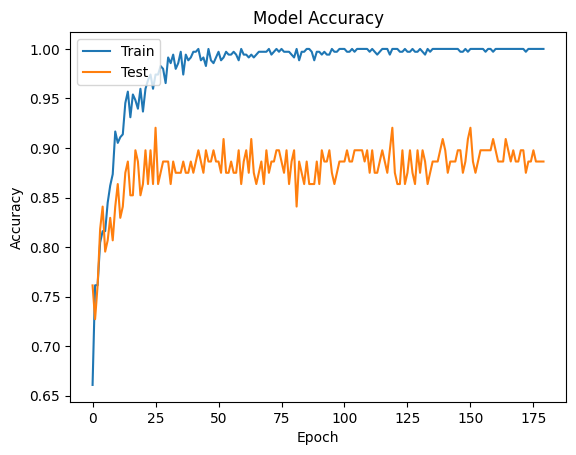

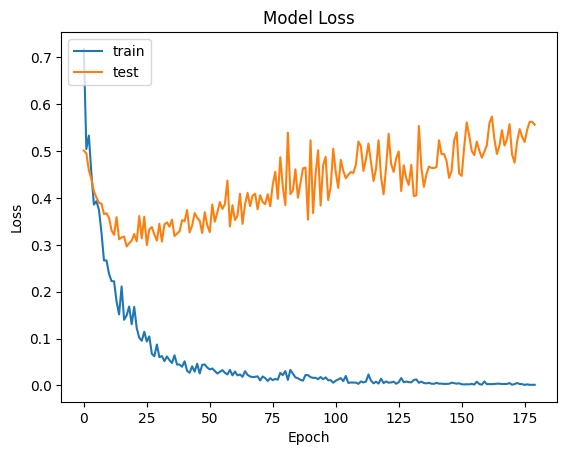

4/4 [==============================] - 1s 138ms/step - loss: 0.2404 - accuracy: 0.9091
Loss of the model is -  0.2404128909111023
4/4 [==============================] - 1s 126ms/step - loss: 0.2404 - accuracy: 0.9091
Accuracy of the model is -  90.90909361839294 %
4/4 [==============================] - 3s 127ms/step


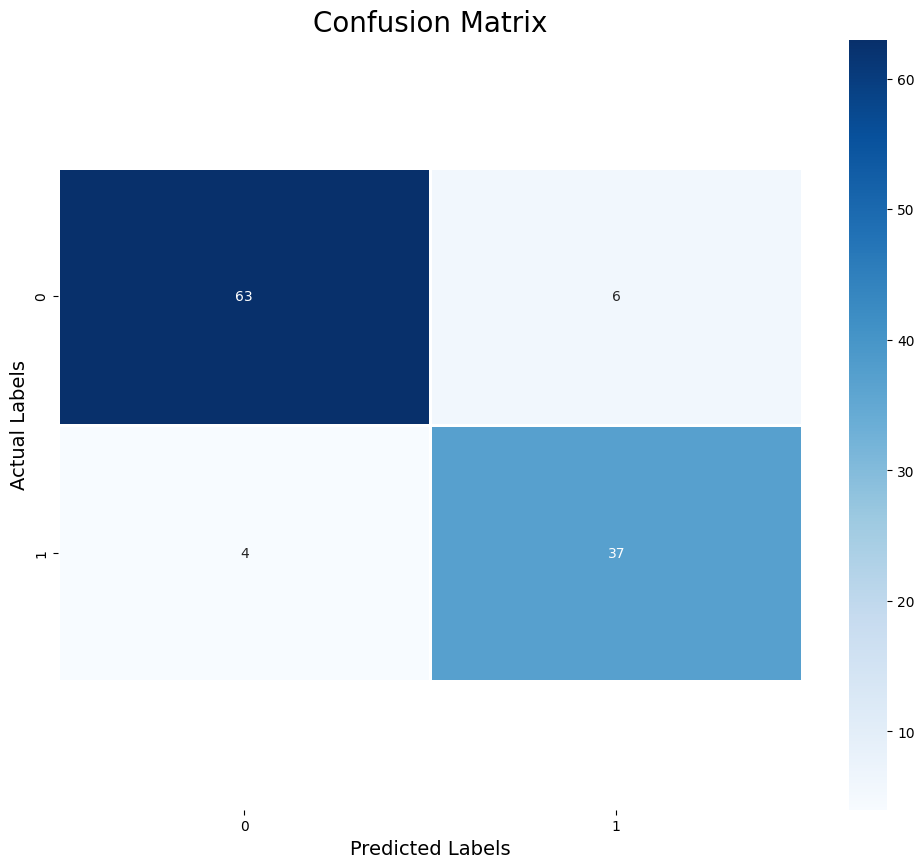

4/4 [==============================] - 1s 121ms/step - loss: 0.2404 - accuracy: 0.9091
Accuracy for <bound method PromptInjectionDetector.combination_1 of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.9090909361839294


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.6609
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 24s 2s/step - loss: 0.6653 - accuracy: 0.6609 - val_loss: 0.5441 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5184 - accuracy: 0.7759
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 333ms/step - loss: 0.5184 - accuracy: 0.7759 - val_loss: 0.4891 - val_accuracy: 0.7273
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5152 - accuracy: 0.7443
Epoch 3: val_accuracy improved from 0.76136 to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 807ms/step - loss: 0.5152 - accuracy: 0.7443 - val_loss: 0.5042 - val_accuracy: 0.7727
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.8103
Epo

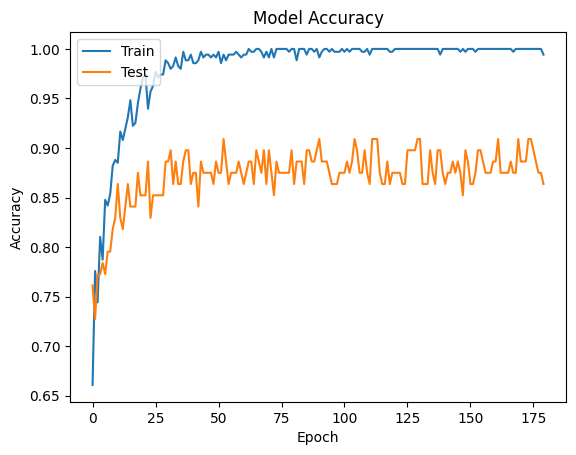

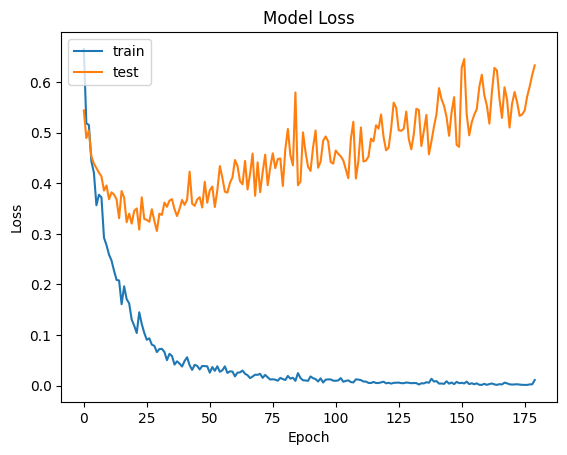

4/4 [==============================] - 1s 131ms/step - loss: 0.2920 - accuracy: 0.9000
Loss of the model is -  0.2919521629810333
4/4 [==============================] - 1s 125ms/step - loss: 0.2920 - accuracy: 0.9000
Accuracy of the model is -  89.99999761581421 %
4/4 [==============================] - 3s 123ms/step


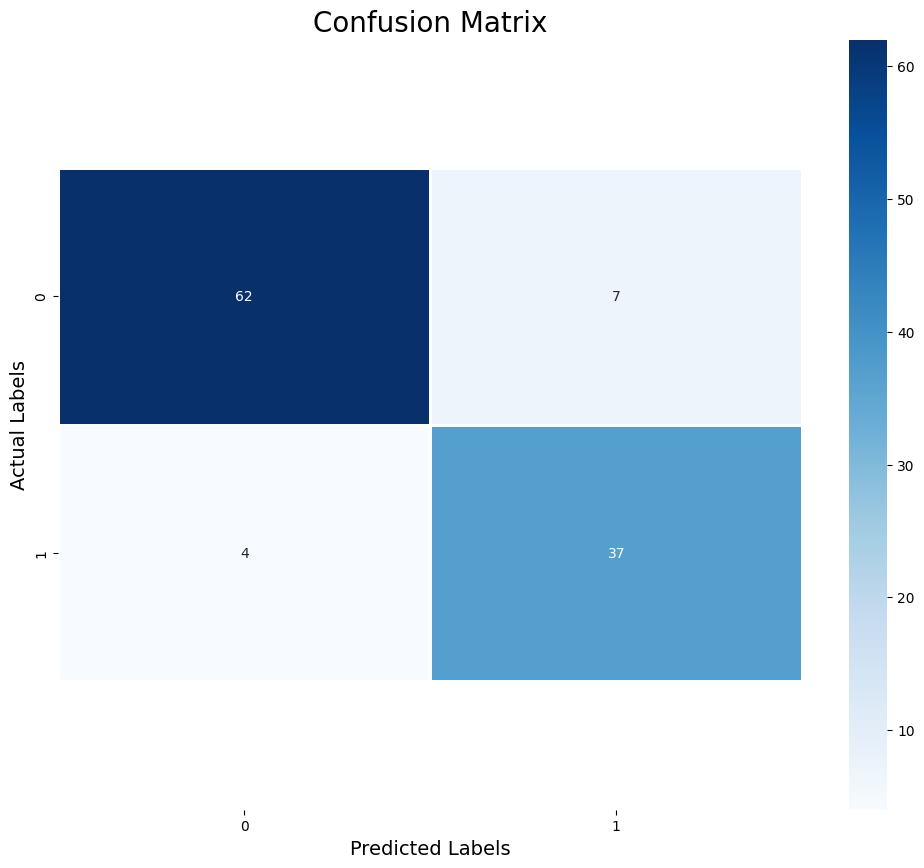

4/4 [==============================] - 1s 119ms/step - loss: 0.2920 - accuracy: 0.9000
Accuracy for <bound method PromptInjectionDetector.detect_syntax_features of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8999999761581421


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.7029 - accuracy: 0.6351
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 2s/step - loss: 0.7029 - accuracy: 0.6351 - val_loss: 0.5030 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5613 - accuracy: 0.7356
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 384ms/step - loss: 0.5613 - accuracy: 0.7356 - val_loss: 0.4723 - val_accuracy: 0.7386
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.4825 - accuracy: 0.7845
Epoch 3: val_accuracy improved from 0.76136 to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 7s 1s/step - loss: 0.4825 - accuracy: 0.7845 - val_loss: 0.4944 - val_accuracy: 0.7727
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4885 - accuracy: 0.7902
Epoch 

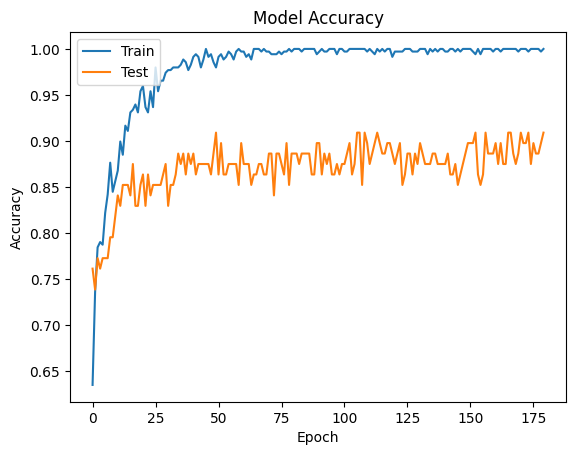

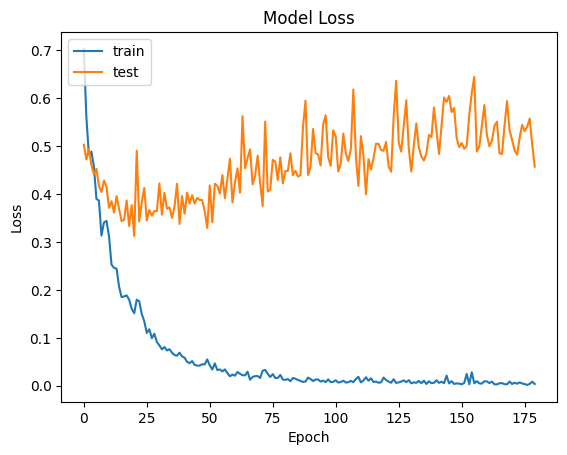

4/4 [==============================] - 1s 122ms/step - loss: 0.2962 - accuracy: 0.9091
Loss of the model is -  0.29624253511428833
4/4 [==============================] - 1s 122ms/step - loss: 0.2962 - accuracy: 0.9091
Accuracy of the model is -  90.90909361839294 %
4/4 [==============================] - 3s 122ms/step


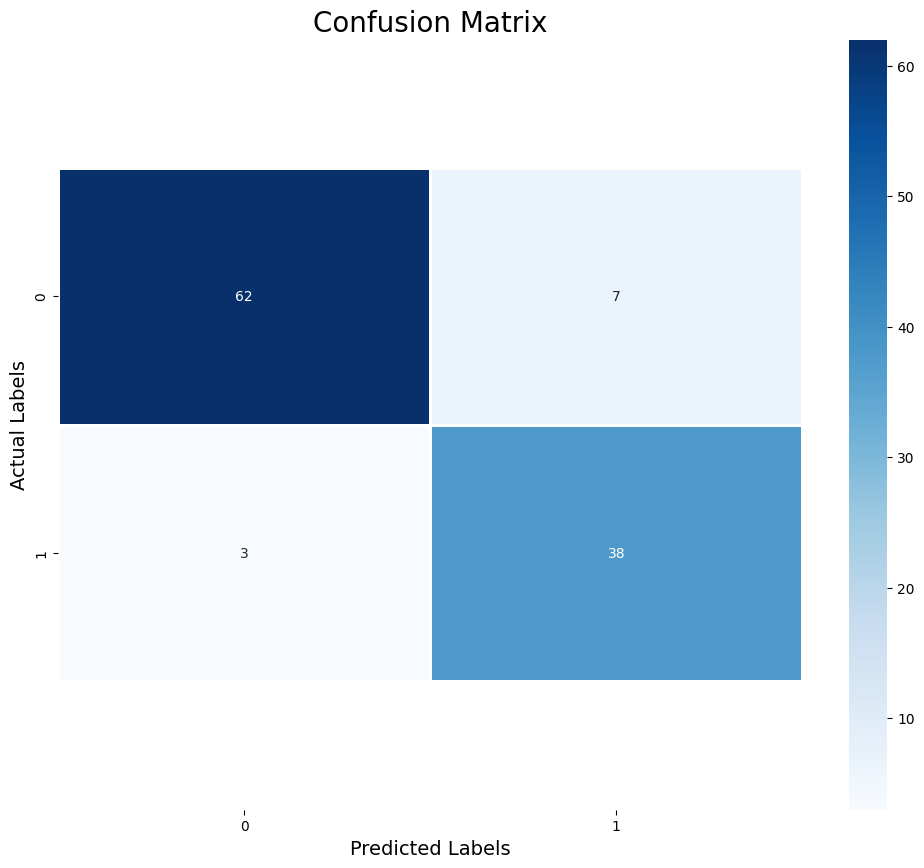

4/4 [==============================] - 1s 122ms/step - loss: 0.2962 - accuracy: 0.9091
Accuracy for <bound method PromptInjectionDetector.sequential_deepening of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.9090909361839294


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.6925
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 25s 2s/step - loss: 0.6648 - accuracy: 0.6925 - val_loss: 0.5578 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7270
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 386ms/step - loss: 0.5924 - accuracy: 0.7270 - val_loss: 0.5332 - val_accuracy: 0.7500
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.7845
Epoch 3: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 386ms/step - loss: 0.4700 - accuracy: 0.7845 - val_loss: 0.5046 - val_accuracy: 0.7159
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.7816
Epoch 4: val_accuracy improved from 0.76136 to 0

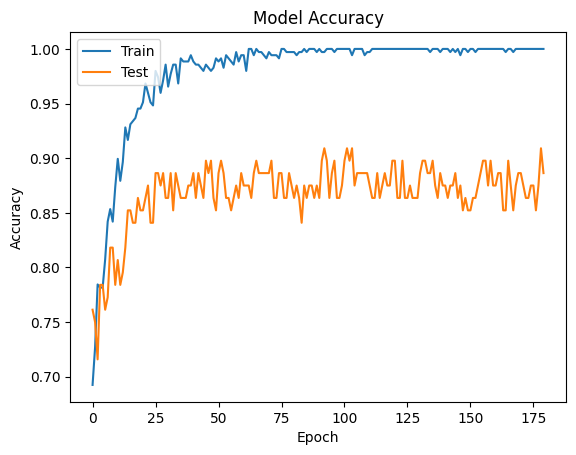

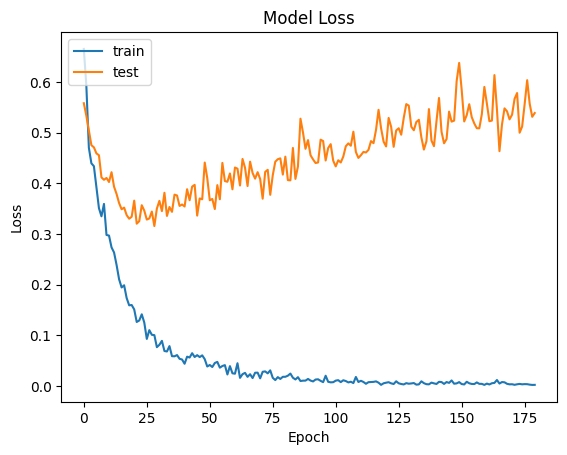

4/4 [==============================] - 1s 132ms/step - loss: 0.3571 - accuracy: 0.9000
Loss of the model is -  0.3571067154407501
4/4 [==============================] - 1s 121ms/step - loss: 0.3571 - accuracy: 0.9000
Accuracy of the model is -  89.99999761581421 %
4/4 [==============================] - 3s 121ms/step


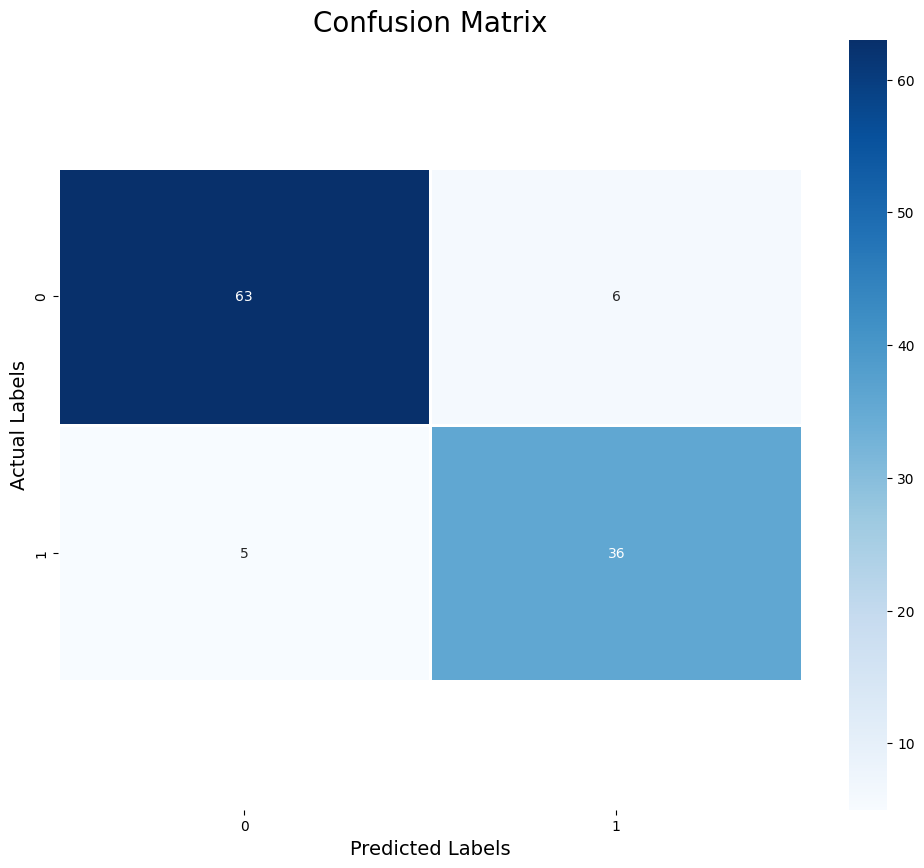

4/4 [==============================] - 1s 120ms/step - loss: 0.3571 - accuracy: 0.9000
Accuracy for <bound method PromptInjectionDetector.iterative_refinement of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8999999761581421


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6403 - accuracy: 0.6810
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 1s/step - loss: 0.6403 - accuracy: 0.6810 - val_loss: 0.5363 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.6279 - accuracy: 0.6954
Epoch 2: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 386ms/step - loss: 0.6279 - accuracy: 0.6954 - val_loss: 0.4897 - val_accuracy: 0.7273
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5416 - accuracy: 0.7529
Epoch 3: val_accuracy did not improve from 0.76136
6/6 [==============================] - 2s 334ms/step - loss: 0.5416 - accuracy: 0.7529 - val_loss: 0.4752 - val_accuracy: 0.7500
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.7356
Epoch 4: val_accuracy improved from 0.76136 to 0

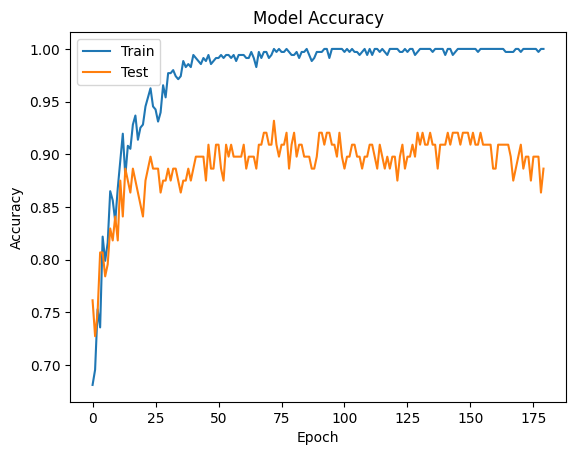

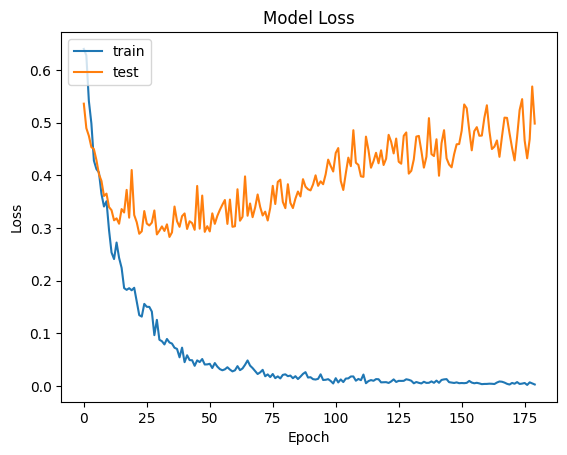

4/4 [==============================] - 1s 125ms/step - loss: 0.2961 - accuracy: 0.8818
Loss of the model is -  0.2961300313472748
4/4 [==============================] - 1s 121ms/step - loss: 0.2961 - accuracy: 0.8818
Accuracy of the model is -  88.1818175315857 %
4/4 [==============================] - 4s 133ms/step


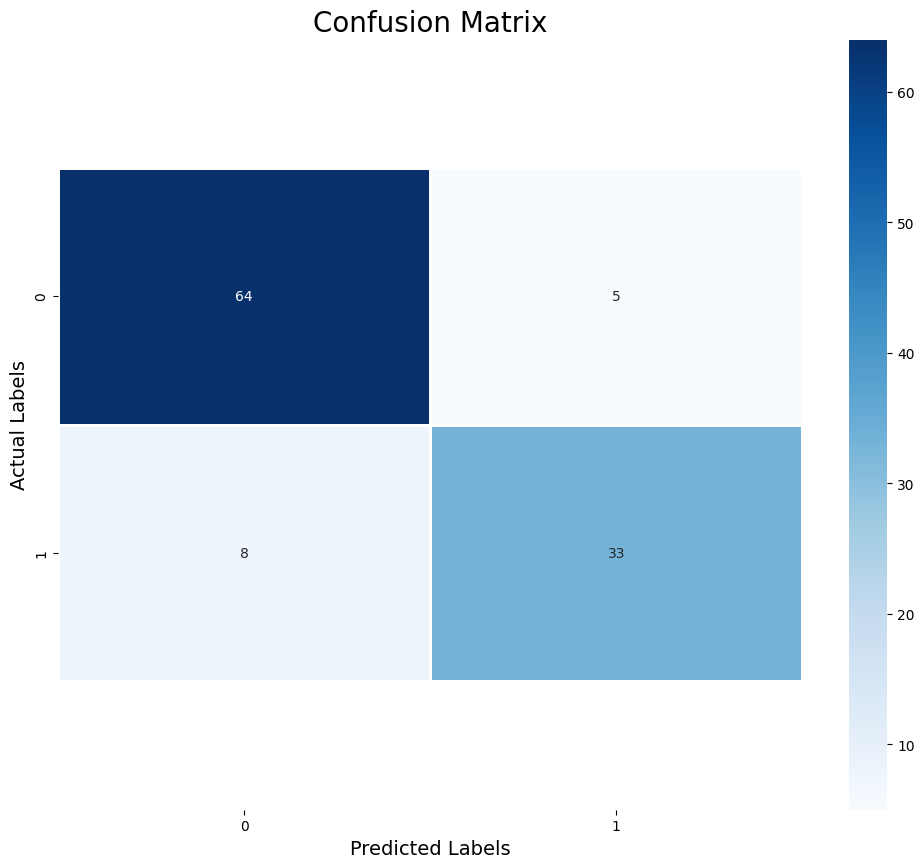

4/4 [==============================] - 1s 121ms/step - loss: 0.2961 - accuracy: 0.8818
Accuracy for <bound method PromptInjectionDetector.segmented_check of <__main__.PromptInjectionDetector object at 0x7e90e98727a0>>: 0.8818181753158569


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.7479 - accuracy: 0.6236
Epoch 1: val_accuracy improved from -inf to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 21s 1s/step - loss: 0.7479 - accuracy: 0.6236 - val_loss: 0.5172 - val_accuracy: 0.7727
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.7443
Epoch 2: val_accuracy did not improve from 0.77273
6/6 [==============================] - 2s 408ms/step - loss: 0.5167 - accuracy: 0.7443 - val_loss: 0.5631 - val_accuracy: 0.7386
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5394 - accuracy: 0.7443
Epoch 3: val_accuracy did not improve from 0.77273
6/6 [==============================] - 2s 359ms/step - loss: 0.5394 - accuracy: 0.7443 - val_loss: 0.4822 - val_accuracy: 0.7614
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4460 - accuracy: 0.7845
Epoch 4: val_accuracy did not improve from 0.772

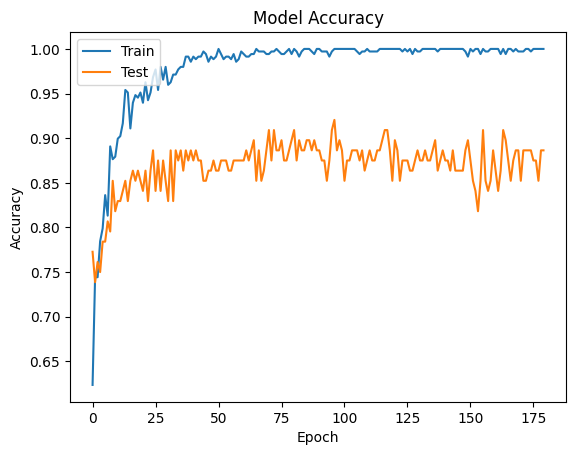

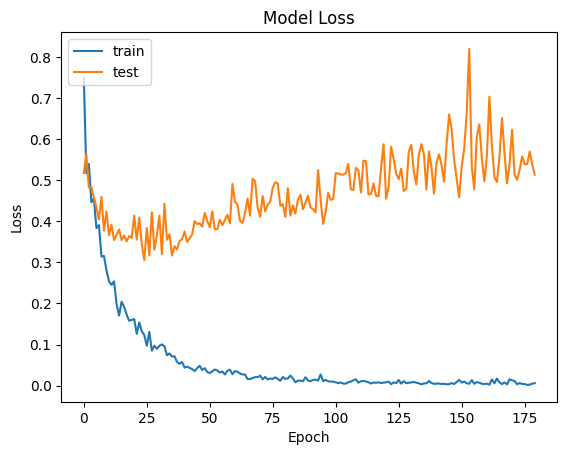

4/4 [==============================] - 1s 128ms/step - loss: 0.3387 - accuracy: 0.8909
Loss of the model is -  0.33868199586868286
4/4 [==============================] - 1s 125ms/step - loss: 0.3387 - accuracy: 0.8909
Accuracy of the model is -  89.09090757369995 %
4/4 [==============================] - 3s 127ms/step


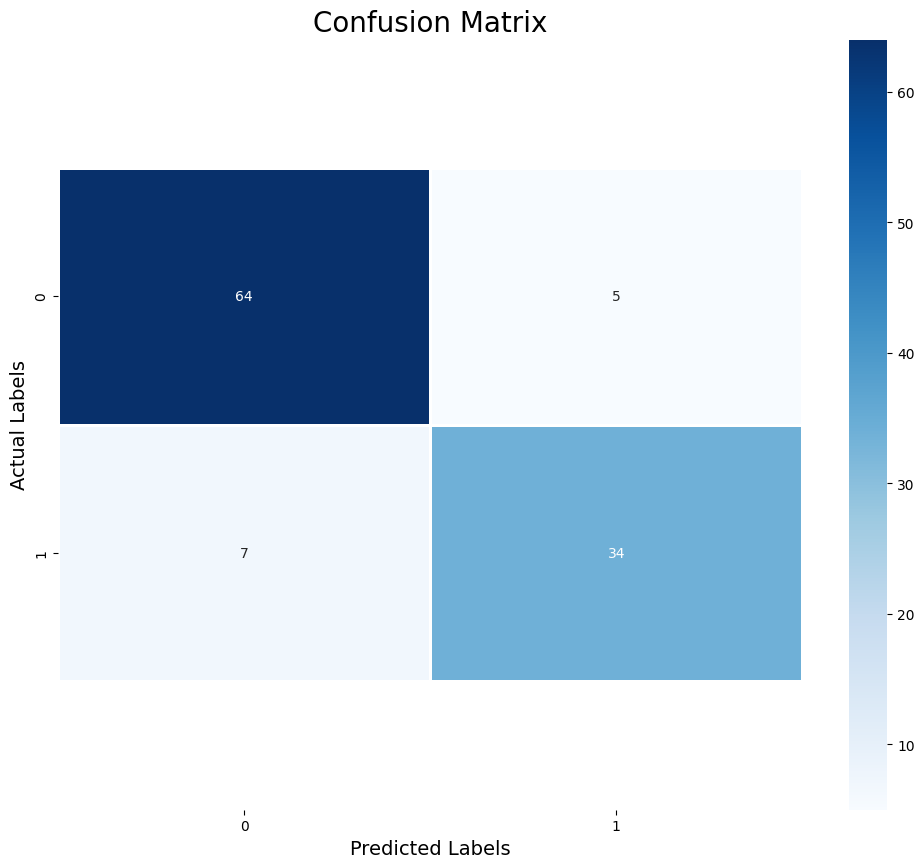

4/4 [==============================] - 1s 123ms/step - loss: 0.3387 - accuracy: 0.8909
Accuracy for <bound method PromptInjectionDetector.weighted_combination of <__main__.PromptInjectionDetector object at 0x79b6db7b1210>>: 0.8909090757369995


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6761 - accuracy: 0.6437
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 1s/step - loss: 0.6761 - accuracy: 0.6437 - val_loss: 0.5202 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.7299
Epoch 2: val_accuracy improved from 0.76136 to 0.77273, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 814ms/step - loss: 0.5465 - accuracy: 0.7299 - val_loss: 0.4651 - val_accuracy: 0.7727
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7672
Epoch 3: val_accuracy did not improve from 0.77273
6/6 [==============================] - 2s 369ms/step - loss: 0.5227 - accuracy: 0.7672 - val_loss: 0.4697 - val_accuracy: 0.7727
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4687 - accuracy: 0.7845
Epo

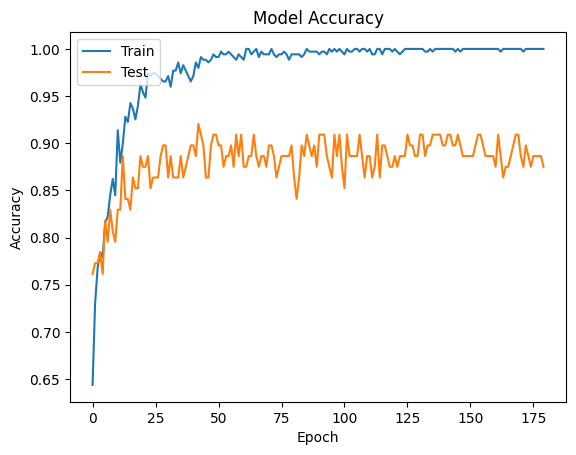

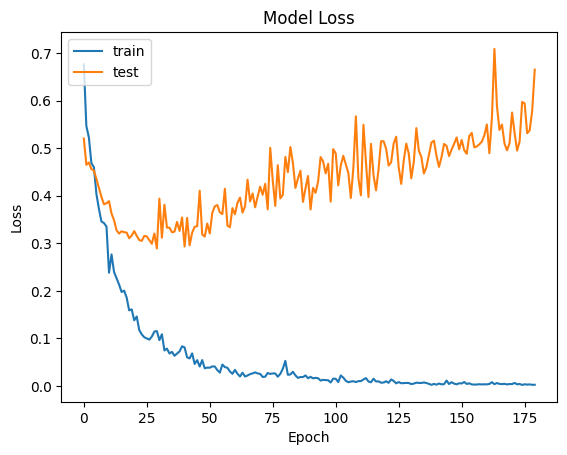

4/4 [==============================] - 1s 127ms/step - loss: 0.3069 - accuracy: 0.8727
Loss of the model is -  0.30690935254096985
4/4 [==============================] - 1s 126ms/step - loss: 0.3069 - accuracy: 0.8727
Accuracy of the model is -  87.27272748947144 %
4/4 [==============================] - 3s 128ms/step


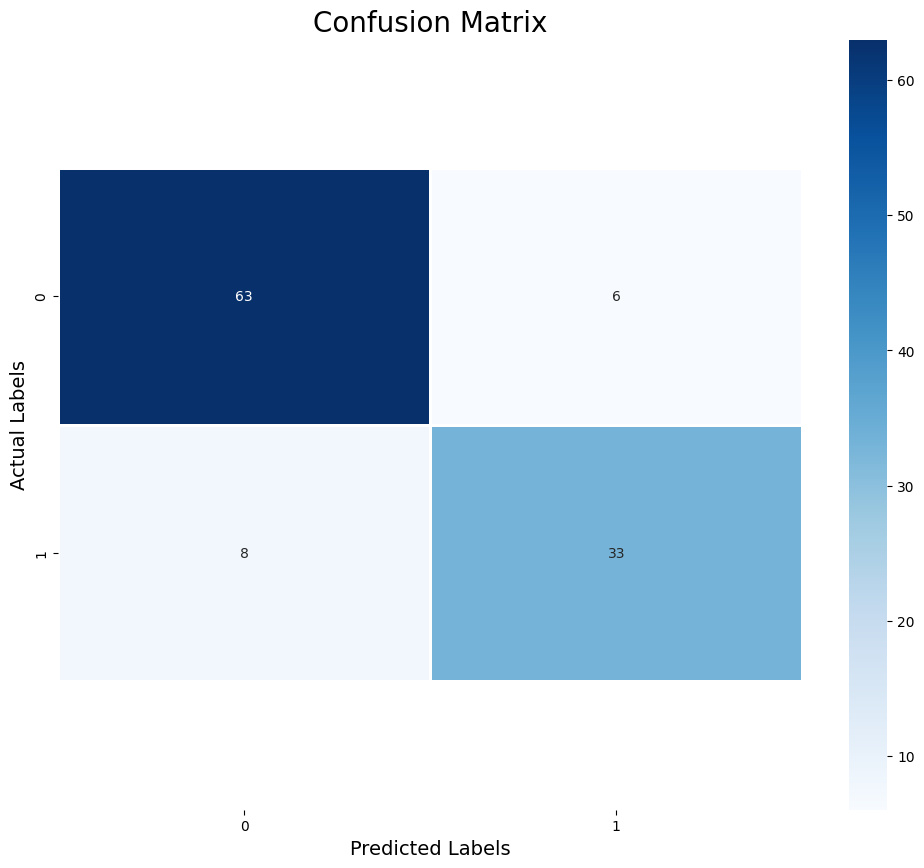

4/4 [==============================] - 1s 127ms/step - loss: 0.3069 - accuracy: 0.8727
Accuracy for <bound method PromptInjectionDetector.detect_typo_levenshtein of <__main__.PromptInjectionDetector object at 0x79b6db7b1210>>: 0.8727272748947144


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.6667
Epoch 1: val_accuracy improved from -inf to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 1s/step - loss: 0.6409 - accuracy: 0.6667 - val_loss: 0.4820 - val_accuracy: 0.7614
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.5501 - accuracy: 0.7443
Epoch 2: val_accuracy improved from 0.76136 to 0.78409, saving model to best_initial_model.hdf5
6/6 [==============================] - 9s 2s/step - loss: 0.5501 - accuracy: 0.7443 - val_loss: 0.4578 - val_accuracy: 0.7841
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.4956 - accuracy: 0.7902
Epoch 3: val_accuracy did not improve from 0.78409
6/6 [==============================] - 2s 398ms/step - loss: 0.4956 - accuracy: 0.7902 - val_loss: 0.4480 - val_accuracy: 0.7727
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.7759
Epoch 

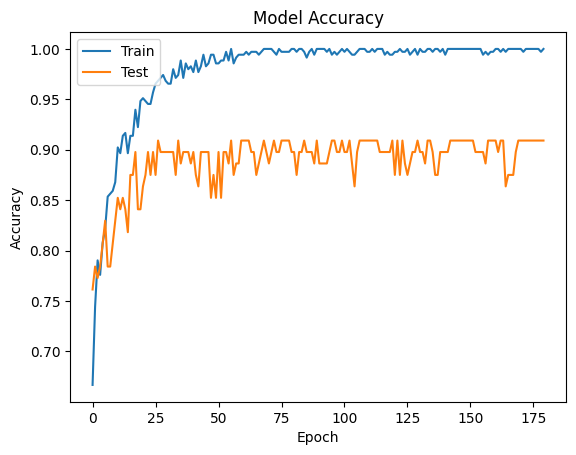

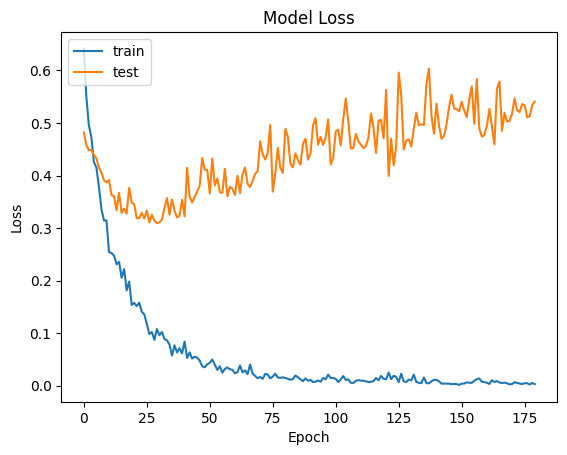

4/4 [==============================] - 1s 133ms/step - loss: 0.2748 - accuracy: 0.8909
Loss of the model is -  0.27480629086494446
4/4 [==============================] - 1s 124ms/step - loss: 0.2748 - accuracy: 0.8909
Accuracy of the model is -  89.09090757369995 %
4/4 [==============================] - 3s 130ms/step


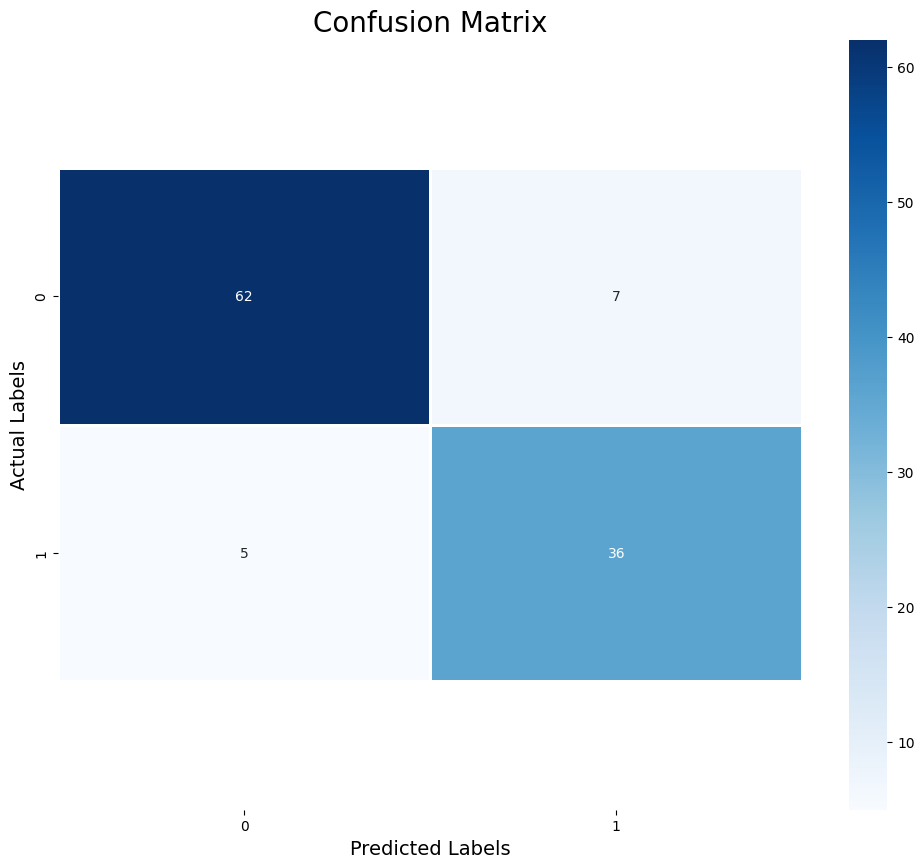

4/4 [==============================] - 1s 127ms/step - loss: 0.2748 - accuracy: 0.8909
Accuracy for <bound method PromptInjectionDetector.detect_special_characters of <__main__.PromptInjectionDetector object at 0x79b6db7b1210>>: 0.8909090757369995


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.6092
Epoch 1: val_accuracy improved from -inf to 0.67045, saving model to best_initial_model.hdf5
6/6 [==============================] - 20s 1s/step - loss: 0.6952 - accuracy: 0.6092 - val_loss: 0.6420 - val_accuracy: 0.6705
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.6983
Epoch 2: val_accuracy improved from 0.67045 to 0.71591, saving model to best_initial_model.hdf5
6/6 [==============================] - 4s 783ms/step - loss: 0.6345 - accuracy: 0.6983 - val_loss: 0.5909 - val_accuracy: 0.7159
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.7557
Epoch 3: val_accuracy improved from 0.71591 to 0.76136, saving model to best_initial_model.hdf5
6/6 [==============================] - 7s 1s/step - loss: 0.5923 - accuracy: 0.7557 - val_loss: 0.4846 - val_accuracy: 0.7614
Epoch 4/180
6/6 [==============================] - ETA

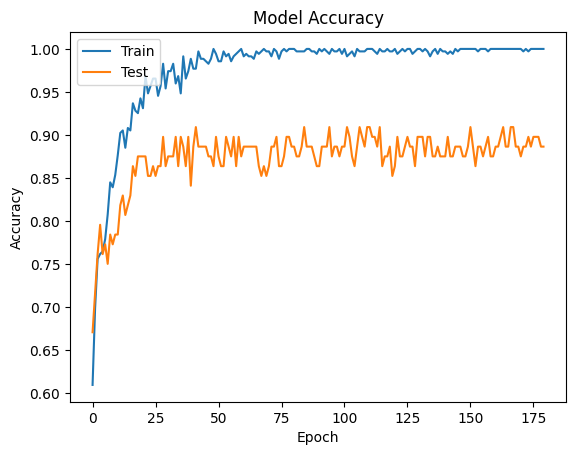

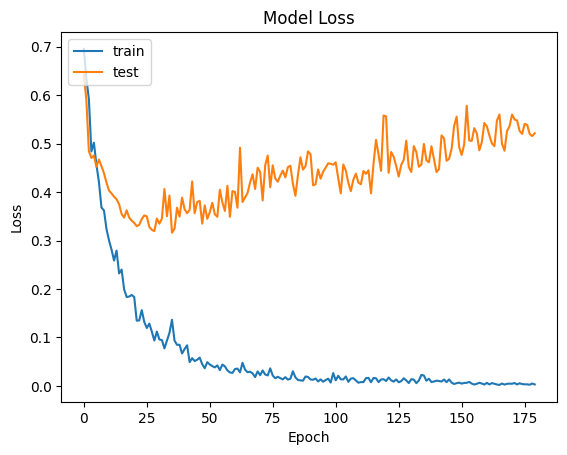

4/4 [==============================] - 1s 144ms/step - loss: 0.2767 - accuracy: 0.9000
Loss of the model is -  0.27669137716293335
4/4 [==============================] - 1s 128ms/step - loss: 0.2767 - accuracy: 0.9000
Accuracy of the model is -  89.99999761581421 %
4/4 [==============================] - 3s 122ms/step


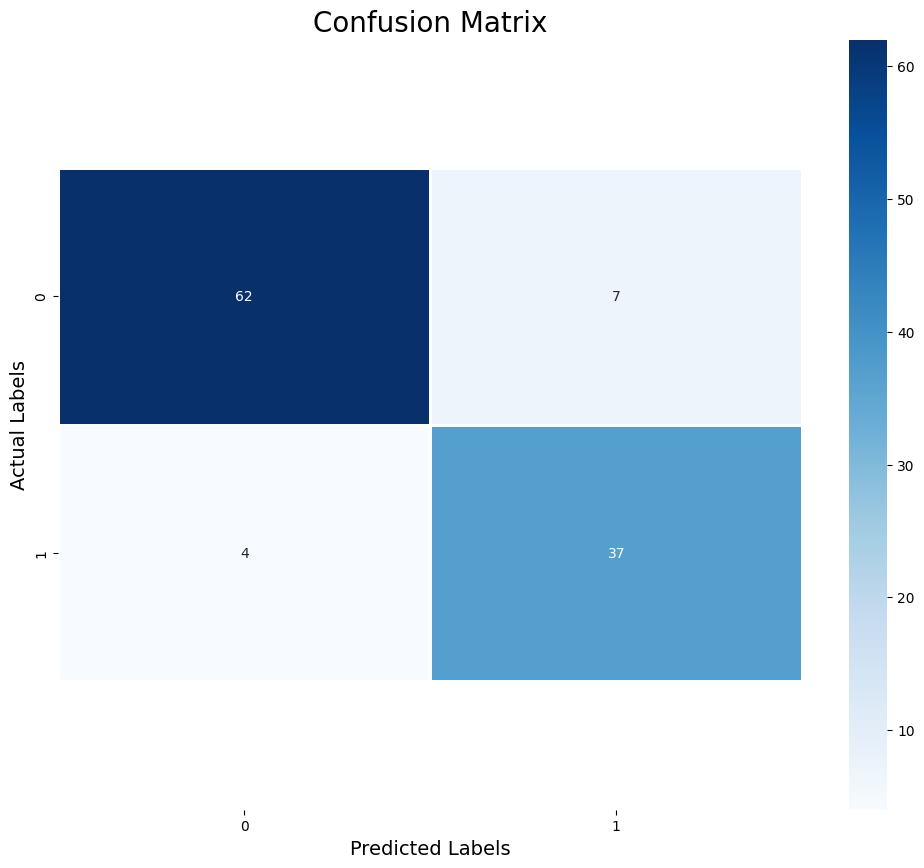

4/4 [==============================] - 1s 126ms/step - loss: 0.2767 - accuracy: 0.9000
Accuracy for <bound method PromptInjectionDetector.detect_regex of <__main__.PromptInjectionDetector object at 0x79b6db7b1210>>: 0.8999999761581421


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/180
6/6 [==============================] - ETA: 0s - loss: 0.7087 - accuracy: 0.6408
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to best_initial_model.hdf5
6/6 [==============================] - 26s 1s/step - loss: 0.7087 - accuracy: 0.6408 - val_loss: 0.6178 - val_accuracy: 0.7500
Epoch 2/180
6/6 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.7385
Epoch 2: val_accuracy did not improve from 0.75000
6/6 [==============================] - 2s 370ms/step - loss: 0.6024 - accuracy: 0.7385 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 3/180
6/6 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.7529
Epoch 3: val_accuracy did not improve from 0.75000
6/6 [==============================] - 2s 388ms/step - loss: 0.5730 - accuracy: 0.7529 - val_loss: 0.4932 - val_accuracy: 0.7386
Epoch 4/180
6/6 [==============================] - ETA: 0s - loss: 0.4894 - accuracy: 0.7500
Epoch 4: val_accuracy improved from 0.75000 to 0

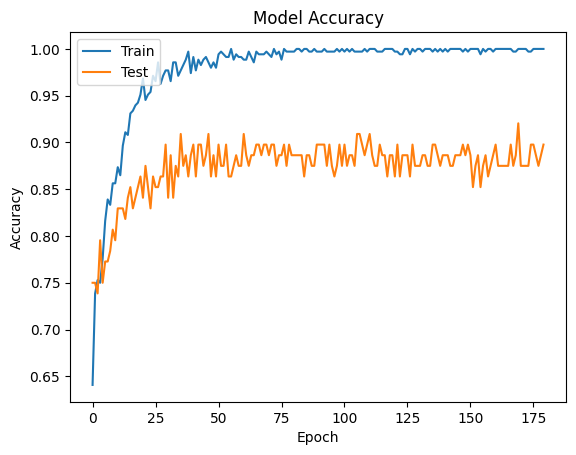

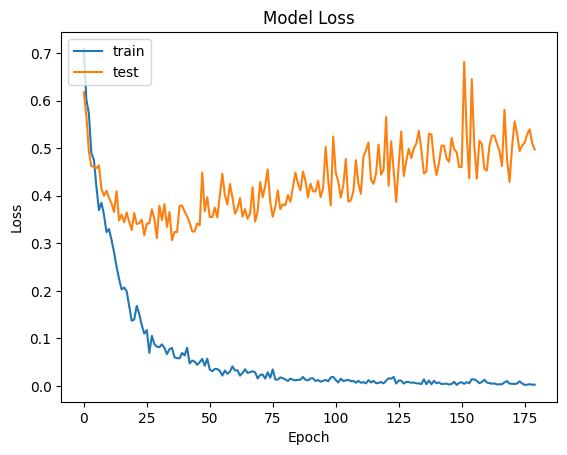

4/4 [==============================] - 1s 134ms/step - loss: 0.3929 - accuracy: 0.9091
Loss of the model is -  0.39292943477630615
4/4 [==============================] - 1s 126ms/step - loss: 0.3929 - accuracy: 0.9091
Accuracy of the model is -  90.90909361839294 %
4/4 [==============================] - 3s 131ms/step


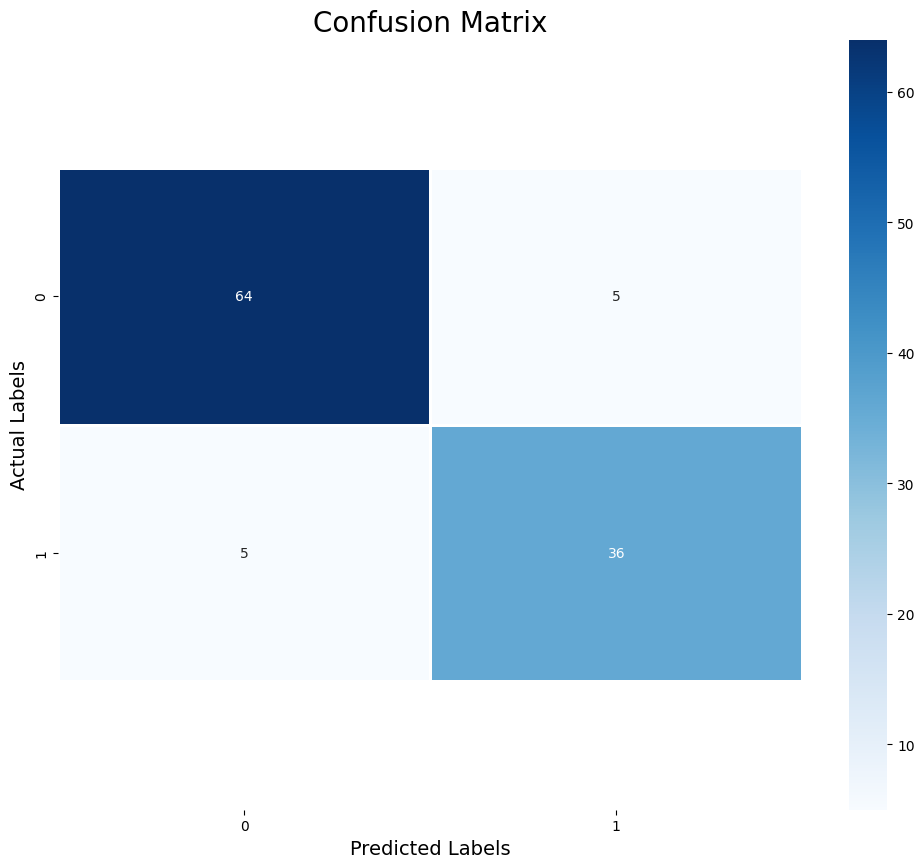

4/4 [==============================] - 1s 132ms/step - loss: 0.3929 - accuracy: 0.9091
Accuracy for <bound method PromptInjectionDetector.detect_code of <__main__.PromptInjectionDetector object at 0x79b6db7b1210>>: 0.9090909361839294


In [ ]:
class PromptInjectionDetector:
    def __init__(self, special_characters):
        self.special_characters = special_characters
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.bert_model = TFBertModel.from_pretrained('bert-base-uncased', trainable=False)
        self.method_accuracies = {}
        self.nlp = spacy.load("en_core_web_sm")

    def preprocess_text(self, text):
        encoded_text = self.tokenizer.encode_plus(text, add_special_tokens=True, max_length=64, pad_to_max_length=True, return_tensors='tf')
        return encoded_text['input_ids'][0].numpy()

    def build_enhanced_neural_network(self, input_shape):
        input_layer = Input(shape=(input_shape,), dtype=tf.int32, name="input_layer")
        bert_output = self.bert_model(input_layer)[0]
        flattened_bert_output = Flatten()(bert_output)
        dense_1 = Dense(256, activation='relu')(flattened_bert_output)
        dropout_1 = Dropout(0.5)(dense_1)
        dense_2 = Dense(128, activation='relu')(dropout_1)
        dropout_2 = Dropout(0.3)(dense_2)
        output_layer = Dense(1, activation='sigmoid')(dropout_2)

        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
        return model

    def train_enhanced_neural_network(self, X_train, X_test, y_train, y_test, method):
        X_train_processed = np.array([self.preprocess_text(text) for text in X_train])
        X_test_processed = np.array([self.preprocess_text(text) for text in X_test])

        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)

        model = self.build_enhanced_neural_network(X_train_processed.shape[1])

        optimizer = Adam(learning_rate=5e-5)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        learning_rate_scheduler = LearningRateScheduler(lambda epoch: 5e-5 * (0.8 ** epoch))

        checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
        # model_history = model.fit(X_train, y_train,batch_size=64, epochs=180, validation_data=(X_test, y_test),callbacks=[checkpoint])

        history = model.fit(
            X_train_processed, y_train_encoded,
            epochs=180, batch_size=64,
            validation_split=0.2,
            callbacks=[checkpoint],
            verbose=1
        )

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        plt.savefig('Initial_Model_Accuracy.png')
        plt.show()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig('Initial_Model_loss.png')
        plt.show()

        model.load_weights("best_initial_model.hdf5")

        print("Loss of the model is - " , model.evaluate(X_test_processed,y_test_encoded)[0])
        print("Accuracy of the model is - " , model.evaluate(X_test_processed,y_test_encoded)[1]*100 , "%")

        predictions = model.predict(X_test_processed)

        finaldf = np.array([y_test_encoded, np.concatenate(predictions)]).T
        finaldf = pd.DataFrame(data=finaldf, columns=["Predicted Values", "Actual Values"])

        cm = confusion_matrix(y_test_encoded, [np.round(i) for i in predictions])
        plt.figure(figsize = (12, 10))
        cm = pd.DataFrame(cm , index = [0, 1] , columns = [i for i in [0, 1]])
        ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        plt.title('Confusion Matrix', size=20)
        plt.xlabel('Predicted Labels', size=14)
        plt.ylabel('Actual Labels', size=14)
        plt.savefig('Initial_Model_Confusion_Matrix.png')
        plt.show()


        self.method_accuracies[method] = model.evaluate(X_test_processed,y_test_encoded)[1]
        print("Accuracy for {}: {}".format(method, model.evaluate(X_test_processed,y_test_encoded)[1]))


    def fit_model_with_enhancements(self):
        dataset = load_dataset("deepset/prompt-injections")
        X = dataset['train']['text']
        y = dataset['train']['label']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        methods = [
            self.combination_5,
            self.combination_4,
            self.combination_3,
            self.combination_2,
            self.combination_1,
            self.detect_syntax_features,
            self.sequential_deepening,
            self.iterative_refinement,
            self.segmented_check,
            self.weighted_combination,
            self.detect_typo_levenshtein,
            self.detect_special_characters,
            self.detect_regex,
            self.detect_code
        ]

        for method in methods:
            X_train_np = np.array(X_train)
            X_test_np = np.array(X_test)
            y_train_np = np.array(y_train)
            y_test_np = np.array(y_test)

            self.train_enhanced_neural_network(X_train_np, X_test_np, y_train_np, y_test_np, method)

        # Print the accuracies for all methods
        for method, accuracy in self.method_accuracies.items():
            print("Accuracy for {}: {}".format(method, accuracy))

    def detect_code(self, text):
        code_keywords = ["os.", "subprocess.", "exec(", "eval(", "system(", "shell(", "`"]
        code_count = sum(1 for keyword in code_keywords if keyword in text)
        return code_count >= 2, code_count

    def detect_regex(self, text):
        regex_patterns = [
            r'\b(re\.\w+\()', r'\b(import\sre|from\sre)', r'\b(pattern|re.compile|re.match|re.search)'
        ]
        regex_count = sum(1 for pattern in regex_patterns if re.search(pattern, text))
        return regex_count > 1, regex_count

    def detect_special_characters(self, text):
        # Perform detection logic
        special_char_count = sum(1 for char in text if char in self.special_characters)
        return special_char_count > 0, special_char_count

    def levenshtein_distance(self, s1, s2):
        len_s1, len_s2 = len(s1), len(s2)

        # Early exit optimization: If the difference in lengths is too large, return a high distance value
        if abs(len_s1 - len_s2) > 3:
            return 10  # Choose a suitable high value

        # Initializing the matrix for dynamic programming
        dp = [[0] * (len_s2 + 1) for _ in range(len_s1 + 1)]

        # Initialization of the first row and column
        for i in range(len_s1 + 1):
            dp[i][0] = i
        for j in range(len_s2 + 1):
            dp[0][j] = j

        # Populate the matrix using dynamic programming
        for i in range(1, len_s1 + 1):
            for j in range(1, len_s2 + 1):
                cost = 0 if s1[i - 1] == s2[j - 1] else 1
                dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)

        return dp[-1][-1]

    def detect_typo_levenshtein(self, text):
        reference_word = "prompt"
        distance = self.levenshtein_distance(reference_word, text.lower())
        threshold = 2  # Lowering the threshold for better accuracy

        # Enhancing accuracy with additional conditions
        if distance > threshold:
            # If the distance is greater than the threshold, consider additional checks
            # Check for transpositions and common mistypings
            if abs(len(reference_word) - len(text)) == 1:
                # Consider transpositions
                for i in range(min(len(reference_word), len(text)) - 1):
                    if reference_word[i] == text[i + 1] and reference_word[i + 1] == text[i]:
                        return (True, distance)  # Return True for transpositions
                # Check for single character additions/deletions
                for i in range(len(text)):
                    edited_text = text[:i] + text[i+1:]
                    if self.levenshtein_distance(reference_word, edited_text) == 1:
                        return (True, distance)  # Return True for single character edits

            return (False, distance)  # Otherwise, return False
        return (False, distance)

    def weighted_combination(self, text):
        weight_code = 0.4
        weight_regex = 0.3
        weight_special_chars = 0.2

        # Get the results from the tuple
        code_detected, _ = self.detect_code(text)
        regex_detected, _ = self.detect_regex(text)
        special_chars_detected, _ = self.detect_special_characters(text)
        typo_detected, _ = self.detect_typo_levenshtein(text)

        # Calculate the weighted sum based on Boolean results
        weighted_sum = (weight_code * code_detected) + (weight_regex * regex_detected) + (weight_special_chars * special_chars_detected) + (weight_typo * typo_detected)

        threshold = 0.5  # Threshold value for determining the presence of injection
        return weighted_sum >= threshold

    def segmented_check(self, text):
        segment_1 = text[:len(text) // 2]  # Первая половина текста
        segment_2 = text[len(text) // 2:]  # Вторая половина текста

        # Применяем разные методы к разным сегментам текста
        check_1 = self.detect_code(segment_1)
        check_2 = self.detect_regex(segment_2)

        # Принимаем решение на основе результатов обоих сегментов
        return check_1 or check_2  # Возвращаем True, если хотя бы один сегмент подозрителен

    def iterative_refinement(self, text):
        # Итеративная проверка с уточнением
        for _ in range(3):  # Проходим несколько раз по тексту для уточнения результата
            code_detected = self.detect_code(text)
            regex_detected = self.detect_regex(text)
            special_chars_detected = self.detect_special_characters(text)
            typo_detected = self.detect_typo_levenshtein(text)

            # Если обнаружено что-то подозрительное, уточняем текст для дальнейшей проверки
            if any([code_detected, regex_detected, special_chars_detected, typo_detected]):
                # Например, убираем часть текста, которая могла вызвать подозрение
                text = text.replace("dangerous_part", "")

        # Возвращаем результат после итераций
        return any([code_detected, regex_detected, special_chars_detected, typo_detected])

    def sequential_deepening(self, text):
        # Последовательная проверка с углублением
        code_detected = self.detect_code(text)
        regex_detected = self.detect_regex(text)
        special_chars_detected = self.detect_special_characters(text)
        typo_detected = self.detect_typo_levenshtein(text)

        # Проверяем наличие подозрительных фрагментов
        suspicious_detected = any([code_detected, regex_detected, special_chars_detected, typo_detected])

        # Если что-то подозрительное обнаружено, углубляем анализ текста
        if suspicious_detected:
            # Выполняем итеративное уточнение и получаем новый результат
            refined_result = self.iterative_refinement(text)

            # Возвращаем результат итеративного уточнения
            return refined_result

        # Возвращаем исходный результат, если ничего подозрительного не обнаружено
        return False

    def detect_syntax_features(self, text):
        doc = self.nlp(text)
        # Пример обнаружения основных признаков синтаксиса
        num_sentences = len(list(doc.sents))
        num_tokens = len(doc)
        num_nouns = len([token for token in doc if token.pos_ == "NOUN"])
        num_verbs = len([token for token in doc if token.pos_ == "VERB"])
        num_adjectives = len([token for token in doc if token.pos_ == "ADJ"])
        num_adverbs = len([token for token in doc if token.pos_ == "ADV"])

        return {
            "num_sentences": num_sentences,
            "num_tokens": num_tokens,
            "num_nouns": num_nouns,
            "num_verbs": num_verbs,
            "num_adjectives": num_adjectives,
            "num_adverbs": num_adverbs
        }

    def combination_1(self, text):
        code_detected = self.detect_code(text)
        special_chars_detected = self.detect_special_characters(text)
        return code_detected and special_chars_detected

    def combination_2(self, text):
        typo_detected = self.detect_typo_levenshtein(text)
        #typo_detected, _ = self.detect_typo_levenshtein(text)
        regex_detected = self.detect_regex(text)
        return typo_detected and regex_detected

    def combination_3(self, text):
        weighted_result = self.weighted_combination(text)
        typo_detected = self.detect_typo_levenshtein(text)
        #typo_detected, _ = self.detect_typo_levenshtein(text)
        return weighted_result or typo_detected

    def combination_4(self, text):
        segmented_result = self.segmented_check(text)
        iterative_result = self.iterative_refinement(text)
        return segmented_result or iterative_result

    def combination_5(self, text):
        sequential_result = self.sequential_deepening(text)
        special_chars_detected = self.detect_special_characters(text)
        return sequential_result and special_chars_detected

special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')']
detector = PromptInjectionDetector(special_characters)
detector.fit_model_with_enhancements()